In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from scipy import stats
import seaborn as sns
import statsmodels.api as sm

matplotlib.rcParams['font.family']='Malgun Gothic'
matplotlib.rcParams['axes.unicode_minus']=False

In [2]:
titanic=sns.load_dataset('titanic')
titanic

survived  pclass     sex   age  sibsp  parch      fare embarked   class  \
0           0       3    male  22.0      1      0    7.2500        S   Third   
1           1       1  female  38.0      1      0   71.2833        C   First   
2           1       3  female  26.0      0      0    7.9250        S   Third   
3           1       1  female  35.0      1      0   53.1000        S   First   
4           0       3    male  35.0      0      0    8.0500        S   Third   
5           0       3    male   NaN      0      0    8.4583        Q   Third   
6           0       1    male  54.0      0      0   51.8625        S   First   
7           0       3    male   2.0      3      1   21.0750        S   Third   
8           1       3  female  27.0      0      2   11.1333        S   Third   
9           1       2  female  14.0      1      0   30.0708        C  Second   
10          1       3  female   4.0      1      1   16.7000        S   Third   
11          1       1  female  58.0      0      0   26.5500        S   First   
12          0       3    male  20.0      0      0    8.0500        S   Third   
13          0       3    male  39.0      1      5   31.2750        S   Third   
14          0       3  female  14.0      0      0    7.8542        S   Third   
15          1       2  female  55.0      0      0   16.0000        S  Second   
16          0       3    male   2.0      4      1   29.1250        Q   Third   
17          1       2    male   NaN      0      0   13.0000        S  Second   
18          0       3  female  31.0      1      0   18.0000        S   Third   
19          1       3  female   NaN      0      0    7.2250        C   Third   
20          0       2    male  35.0      0      0   26.0000        S  Second   
21          1       2    male  34.0      0      0   13.0000        S  Second   
22          1       3  female  15.0      0      0    8.0292        Q   Third   
23          1       1    male  28.0      0      0   35.5000        S   First   
24          0       3  female   8.0      3      1   21.0750        S   Third   
25          1       3  female  38.0      1      5   31.3875        S   Third   
26          0       3    male   NaN      0      0    7.2250        C   Third   
27          0       1    male  19.0      3      2  263.0000        S   First   
28          1       3  female   NaN      0      0    7.8792        Q   Third   
29          0       3    male   NaN      0      0    7.8958        S   Third   
..        ...     ...     ...   ...    ...    ...       ...      ...     ...   
861         0       2    male  21.0      1      0   11.5000        S  Second   
862         1       1  female  48.0      0      0   25.9292        S   First   
863         0       3  female   NaN      8      2   69.5500        S   Third   
864         0       2    male  24.0      0      0   13.0000        S  Second   
865         1       2  female  42.0      0      0   13.0000        S  Second   
866         1       2  female  27.0      1      0   13.8583        C  Second   
867         0       1    male  31.0      0      0   50.4958        S   First   
868         0       3    male   NaN      0      0    9.5000        S   Third   
869         1       3    male   4.0      1      1   11.1333        S   Third   
870         0       3    male  26.0      0      0    7.8958        S   Third   
871         1       1  female  47.0      1      1   52.5542        S   First   
872         0       1    male  33.0      0      0    5.0000        S   First   
873         0       3    male  47.0      0      0    9.0000        S   Third   
874         1       2  female  28.0      1      0   24.0000        C  Second   
875         1       3  female  15.0      0      0    7.2250        C   Third   
876         0       3    male  20.0      0      0    9.8458        S   Third   
877         0       3    male  19.0      0      0    7.8958        S   Third   
878         0       3    male   NaN      0      0    7.8958        S   Third   
879  

In [20]:
df=titanic.drop(columns=['deck']).query('age>0')

In [25]:
g=df.groupby('survived')
g.count()

pclass  sex  age  sibsp  parch  fare  embarked  class  who  \
survived                                                               
0            424  424  424    424    424   424       424    424  424   
1            290  290  290    290    290   290       288    290  290   

          adult_male  embark_town  alive  alone  
survived                                         
0                424          424    424    424  
1                290          288    290    290

In [33]:
g=df.groupby('pclass')
g.sum()['survived']/g.count()['survived']

pclass
1    0.655914
2    0.479769
3    0.239437
Name: survived, dtype: float64

In [37]:
fam=df[df['sibsp']==1]
fam['survived'].sum()/fam.count()

survived       0.530055
pclass         0.530055
sex            0.530055
age            0.530055
sibsp          0.530055
parch          0.530055
fare           0.530055
embarked       0.530055
class          0.530055
who            0.530055
adult_male     0.530055
embark_town    0.530055
alive          0.530055
alone          0.530055
dtype: float64

In [38]:
alone=df[df['alone']==True]
alone['survived'].sum()/alone.count()

survived       0.321782
pclass         0.321782
sex            0.321782
age            0.321782
sibsp          0.321782
parch          0.321782
fare           0.321782
embarked       0.323383
class          0.321782
who            0.321782
adult_male     0.321782
embark_town    0.323383
alive          0.321782
alone          0.321782
dtype: float64

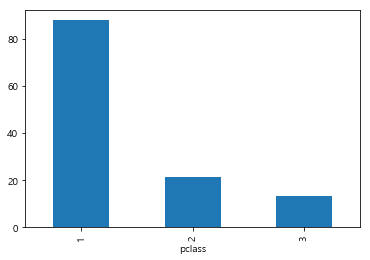

In [41]:
g=df.groupby('pclass')['fare']
g.mean().plot(kind='bar')